# Stationary Series

As a preliminary, we define an important concept, that of a stationary series.  For an ACF to make sense, the series must be a weakly stationary series.  This means that the autocorrelation for any particular lag is the same regardless of where we are in time.

Definition: A series $y_t$ is said to be (weakly) stationary if it satisfies the following properties:

* The mean $E(y_t)$ is the same for all $t$.
* The variance of $y_t$ is the same for all $t$.
* The covariance (and also correlation) between $y_t$ and $y_{t-h}$ is the same for all t.

# Properties of AR(1) Model

Consider the AR(1) model:

$$\begin{equation}
y_t = \beta_1 y_{t-1} + \beta_0 + \epsilon
\end{equation}$$

* The expection of $y_t$ is: $E(y_t) = \frac {\beta_0} {1 - \beta_1}$

* The variance of $y_t$ is: $Var(y_t) = \frac {Var(\epsilon)} {1 - \beta_1^2}$

* The correlation between observations h time periods apart is: $\rho_h = \beta_1^h$

The ACF property defines a distinct pattern for the autocorrelations.  For a positive value of $\beta_1$, the ACF exponentially decreases to 0 as the lag h increases.  For negative  $\beta_1$, the ACF also exponentially decays to 0 as the lag increases, but the algebraic signs for the autocorrelations alternate between positive and negative.

# Regression with Autocorrelated Errors: The Durbin-Watson Test

We usually assume that the error terms are independent unless there is a specific reason to think that this is not the case. Usually violation of this assumption occurs because there is a known temporal component for how the observations were drawn. The easiest way to assess if there is dependency is by producing a scatterplot of the residuals versus the time measurement for that observation (assuming you have the data arranged according to a time sequence order). If the data are independent, then the residuals should look randomly scattered about 0. However, if a noticeable pattern emerges (particularly one that is cyclical) then dependency is likely an issue.


Recall that if we have a first-order autocorrelation with the errors, then the errors are modeled as:

$$\begin{equation}
\epsilon_t = \rho \epsilon_{t-1} + w_t
\end{equation}$$

Where the $w_t$ are identically, independently distributed, each with a normal distribution having mean 0 and the same variance, and $\lvert \rho \rvert < 1$ 

the Durbin-Watson test is a formal test for $\rho$.

Null Hypothesis $H_0:  \rho = 0$

Alt. Hypothesis $H_1:  \rho \neq 0$

The test statistic for the Durbin-Watson test is obtained by:
    
$$\begin{equation}
D=\frac {\sum_{t=2}^{n} (e_{t}-e_{t-1})^{2}} {\sum_{t=1}^{n}e_{t}^{2}}
\end{equation}$$

where $e_t = y_t − \hat{y_t}$ are the residuals from the ordinary least squares fit. 

# Ljung-Box Q Test

The Ljung-Box Q test (sometimes called the Portmanteau test) is used to test whether or not observations over time are random and independent. In particular, for a given $k$, it tests the following:

Null Hypothesis $H_0$: the autocorrelations up to lag $k$ are all 0.

Alt. Hypothesis $H_1$: the autocorrelations of one or more lags differ from 0.

The test statistic is calculated as:

$$\begin{equation}  
Q_{k} = n(n+2) \sum_{j=1}^{k} \frac {{r}^{2}_{j}} {n-j}
\end{equation}$$

# Illustration: Blaisdell Company Data

In [1]:
import numpy as np
import pandas as pd
%pylab inline
pylab.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [5]:
blaisdell = pd.read_csv('blaisdell.csv').set_index('time')

In [6]:
blaisdell

,comsales,indsales
time,,
1,20.96,127.3
2,21.40,130.0
3,21.96,132.7
4,21.52,129.4
5,22.39,135.0
6,22.76,137.1
7,23.48,141.2
8,23.66,142.8
9,24.10,145.5


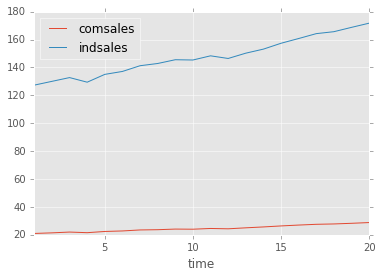

In [7]:
blaisdell.plot(kind='line')

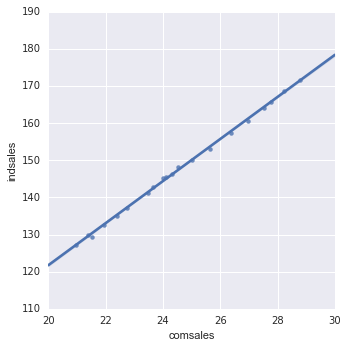

In [9]:
import seaborn as sns
sns.lmplot('comsales', 'indsales', data=blaisdell)

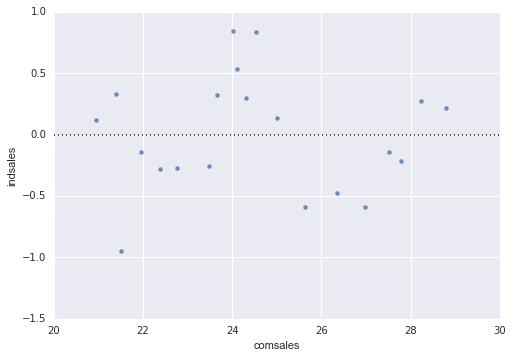

In [10]:
sns.residplot('comsales', 'indsales', data=blaisdell)

In [12]:
import statsmodels.formula.api as sm

model = sm.ols(formula='indsales ~ comsales', data=blaisdell)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               indsales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.489e+04
Date:                Tue, 02 May 2017   Prob (F-statistic):           1.01e-27
Time:                        22:04:25   Log-Likelihood:                -12.971
No. Observations:                  20   AIC:                             29.94
Df Residuals:                      18   BIC:                             31.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4207      1.146      7.347      0.000       6.013      10.828
comsales       5.6659      0.046    122.017      0.000       5.568       5.763
==============================================================================
Omnibus:                        0.037   Durbin-Watson:                   0.739
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.258
Skew:                           0.012   Prob(JB):                        0.879
Kurtosis:                       2.444   Cond. No.                         260.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Calculate Durbin-Watson test statistic by hand
residuals = result.resid.copy()

In [20]:
squared_errors = residuals ** 2
error_diff_squared = residuals.diff(1) ** 2
durbin_watson = error_diff_squared.sum() / squared_errors.sum()

print('The Durbin-Watson statistic is: {0:.3f}'.format(durbin_watson))

The Durbin-Watson statistic is: 0.739


In [108]:
# Calculate Ljung-Box Q test statistic by hand

def lbq(resids, lags=1):
    """
    Calculate and return LBQ test statistic for lag=1, 2, 3, ..., lags.
    """
    assert lags >= 1
    n = len(resids)
    
    autocorrs = np.asarray([resids.autocorr(j)**2 / (n-j) for j in range(1, lags+1)])
    lbq_val = n * (n + 2) * autocorrs.cumsum()
    
    return lbq_val

In [113]:
lbq(residuals, 5)

array([  9.13231308,  10.86379194,  11.34342905,  20.02430506,  39.01687874])

In [111]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [115]:
acorr_ljungbox(residuals, lags=5)[0]

array([  9.00338197,  10.66343636,  11.09952693,  17.34734929,  29.10285083])